# Benchmarking the unoptimized and the optimized model
For each configuration, the simulation was run four times. Out of these computation times the average was taken for each configuration. The simulation setup as defined in [namelist.py](optimized/nmwc_model_optimized/namelist.py) was used for both the unoptimized and the optimized version (5040 gridpoints). The time was measured from the start of the first iteration, until the end of the last iteration of the main loop. The unit used is seconds.

In [ ]:
!pip install uncertainties numpy matplotlib pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uncertainties import ufloat
from matplotlib.ticker import ScalarFormatter

The time durations below were found using the [run-models](run-models.ipynb) Notebook and saved into the [measurements](measurements/) folder. For single node performance, both the Piz Daint supercomputer and a higher-end consumer-grade laptop were used. The multi-node performance was evaluated just on Piz Daint.

## Single node performance

In [2]:
df_s = pd.read_csv("measurements/benchmark_single_node.csv", delimiter=", ") \
    .groupby(by=["machine", "codebase", "n_workers"]) \
    .agg(duration=("duration_slowest_worker", "mean"), std=("duration_slowest_worker", "std")) \
    .reset_index()
df_s["repr"] = df_s.apply(lambda row: f"${ufloat(row['duration'], row['std']):L}$", axis=1)
# print(df_s[["machine", "codebase", "n_workers", "repr"]].to_latex(index=False))
df_s

/tmp/ipykernel_2767/3732412769.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_s = pd.read_csv("measurements/benchmark_single_node.csv", delimiter=", ") \


,machine,codebase,n_workers,duration,std,repr
0,pizdaint,optimized,2,306.5250,2.747223,$306.5 \pm 2.7$
1,pizdaint,optimized,3,218.0500,0.990690,$218.1 \pm 1.0$
2,pizdaint,optimized,4,169.4825,0.886393,$169.5 \pm 0.9$
3,pizdaint,optimized,5,140.9725,0.193111,$140.97 \pm 0.19$
4,pizdaint,optimized,6,121.3275,0.581112,$121.3 \pm 0.6$
5,pizdaint,optimized,8,94.5750,0.367831,$94.6 \pm 0.4$
6,pizdaint,optimized,10,80.9475,0.270108,$80.95 \pm 0.27$
7,pizdaint,optimized,12,70.6750,0.162173,$70.67 \pm 0.16$
8,pizdaint,optimized,14,96.6075,0.601741,$96.6 \pm 0.6$
9,pizdaint,optimized,16,88.1100,0.175119,$88.11 \pm 0.18$


The best improvements are found for the following configurations:

In [4]:
worst_pizdaint = df_s.iloc[df_s[df_s["machine"] == "pizdaint"]["duration"].idxmax()]
print(f"Pizdaint single node worst \tn={worst_pizdaint['n_workers']} \t-> duration = {worst_pizdaint['repr']}")

best_pizdaint = df_s.iloc[df_s[df_s["machine"] == "pizdaint"]["duration"].idxmin()]
print(f"Pizdaint single node best \tn={best_pizdaint['n_workers']} \t-> duration = {best_pizdaint['repr']}")

print(f"Pizdaint single node improvement: {(worst_pizdaint['duration'] - best_pizdaint['duration']) / worst_pizdaint['duration'] * 100:3.1f}% 🎉\n")

worst_x1carbon = df_s.iloc[df_s[df_s["machine"] == "x1carbon"]["duration"].idxmax()]
print(f"X1Carbon single node worst \tn={worst_x1carbon['n_workers']} \t-> duration = {worst_x1carbon['repr']}")

best_x1carbon = df_s.iloc[df_s[df_s["machine"] == "x1carbon"]["duration"].idxmin()]
print(f"X1Carbon single node best \tn={best_x1carbon['n_workers']} \t-> duration = {best_x1carbon['repr']}")

print(f"X1Carbon single node improvement: {(worst_x1carbon['duration'] - best_x1carbon['duration']) / worst_x1carbon['duration'] * 100:3.1f}% 🎉")

Pizdaint single node worst 	n=1 	-> duration = $601 \pm 4$
Pizdaint single node best 	n=12 	-> duration = $70.67 \pm 0.16$
Pizdaint single node improvement: 88.2% 🎉

X1Carbon single node worst 	n=1 	-> duration = $\left(1.16 \pm 0.04\right) \times 10^{3}$
X1Carbon single node best 	n=14 	-> duration = $221.7 \pm 2.2$
X1Carbon single node improvement: 80.9% 🎉


We now create a figure to visualize these findings.

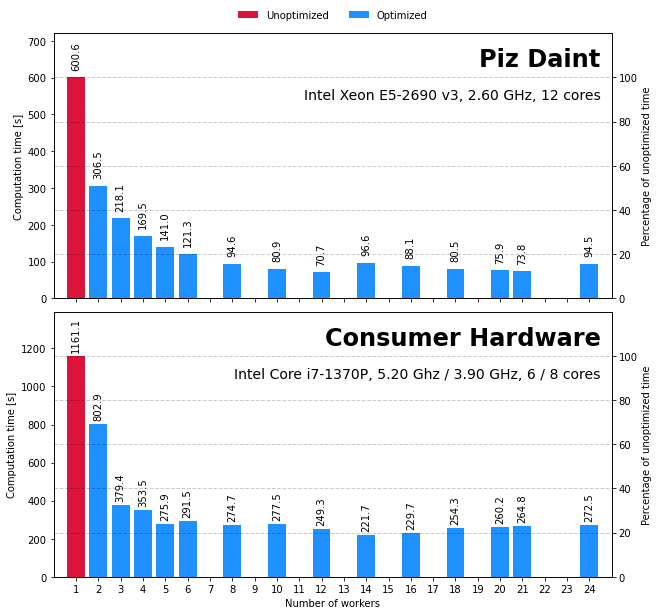

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, sharey=False)
plt.subplots_adjust(wspace=0, hspace=0.05)

percentages = np.arange(0, 101, 20) # percentages for right axis
max_n_workers = df_s["n_workers"].to_numpy().max()

# Piz Daint
ax1.bar([1], 
        df_s[(df_s["machine"] == "pizdaint") & (df_s["codebase"] == "unoptimized")]["duration"].to_numpy(), 
        label="Unoptimized",
        color="crimson")
ax1.bar(df_s[(df_s["machine"] == "pizdaint") & (df_s["codebase"] == "optimized")]["n_workers"].to_numpy(),
        df_s[(df_s["machine"] == "pizdaint") & (df_s["codebase"] == "optimized")]["duration"].to_numpy(), 
        label="Optimized",
        color="dodgerblue")

max_duration1 = df_s[df_s["machine"] == "pizdaint"]["duration"].to_numpy().max()

ax1b = ax1.twinx()
ax1b.hlines(percentages, 0, max_n_workers + 1, "k", "dashed", linewidth=1, alpha=0.2)

for index, row in df_s[df_s["machine"] == "pizdaint"].iterrows():
    ax1.text(row["n_workers"], row["duration"] + 20, f"{row['duration']:3.1f}",
             horizontalalignment="center", verticalalignment="bottom", rotation=90)

# Consumer hardware
ax2.bar([1], 
        df_s[(df_s["machine"] == "x1carbon") & (df_s["codebase"] == "unoptimized")]["duration"].to_numpy(), 
        label="Unoptimized",
        color="crimson")
ax2.bar(df_s[(df_s["machine"] == "x1carbon") & (df_s["codebase"] == "optimized")]["n_workers"].to_numpy(),
        df_s[(df_s["machine"] == "x1carbon") & (df_s["codebase"] == "optimized")]["duration"].to_numpy(), 
        label="Optimized",
        color="dodgerblue")

max_duration2 = df_s[df_s["machine"] == "x1carbon"]["duration"].to_numpy().max()

ax2b = ax2.twinx()
ax2b.hlines(percentages, 0, max_n_workers + 1, "k", "dashed", linewidth=1, alpha=0.2)

for index, row in df_s[df_s["machine"] == "x1carbon"].iterrows():
    ax2.text(row["n_workers"], row["duration"] + 20, f"{row['duration']:3.1f}",
             horizontalalignment="center", verticalalignment="bottom", rotation=90)

# Labels, legend, limits
ax2.set_xlabel("Number of workers")
ax1.set_ylabel("Computation time [s]")
ax2.set_ylabel("Computation time [s]")
ax1b.set_ylabel("Percentage of unoptimized time")
ax2b.set_ylabel("Percentage of unoptimized time")
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2, fancybox=True, shadow=False, edgecolor="w")
ax2.set_xticks(np.arange(1, max_n_workers + 1, 1))
ax2.set_xlim(0, max_n_workers + 1)
ax1.set_ylim(0, max_duration1 * 1.2)
ax2.set_ylim(0, max_duration2 * 1.2)
ax1b.set_ylim(0, 100 * 1.2)
ax2b.set_ylim(0, 100 * 1.2)
ax1b.set_yticks(percentages)
ax2b.set_yticks(percentages)
ax1b.text(max_n_workers + 0.5, 105, "Piz Daint", horizontalalignment="right", fontsize=24, fontweight="bold")
ax1b.text(max_n_workers + 0.5, 90, "Intel Xeon E5-2690 v3, 2.60 GHz, 12 cores", horizontalalignment="right", fontsize=14)
ax2b.text(max_n_workers + 0.5, 105, "Consumer Hardware", horizontalalignment="right", fontsize=24, fontweight="bold")
ax2b.text(max_n_workers + 0.5, 90, "Intel Core i7-1370P, 5.20 Ghz / 3.90 GHz, 6 / 8 cores", horizontalalignment="right", fontsize=14)

fig.savefig("single-node-plot.pdf", bbox_inches="tight")

## Multi-node performance

Let's compute and visualize the results of a multi-node performance comparison:

In [6]:
df_m = pd.read_csv("measurements/benchmark_multi_node.csv", delimiter=", ")
# print(df_m[["machine", "codebase", "n_workers", "duration_slowest_worker"]].to_latex(index=False))
df_m

/tmp/ipykernel_2767/1333318267.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_m = pd.read_csv("measurements/benchmark_multi_node.csv", delimiter=", ")


,machine,codebase,n_workers,duration_slowest_worker
0,pizdaint,unoptimized,1,603.88
1,pizdaint,optimized,2,295.27
2,pizdaint,optimized,3,200.66
3,pizdaint,optimized,4,150.63
4,pizdaint,optimized,5,122.00
5,pizdaint,optimized,6,104.11
6,pizdaint,optimized,7,91.25
7,pizdaint,optimized,8,80.90
8,pizdaint,optimized,9,74.30
9,pizdaint,optimized,10,67.42


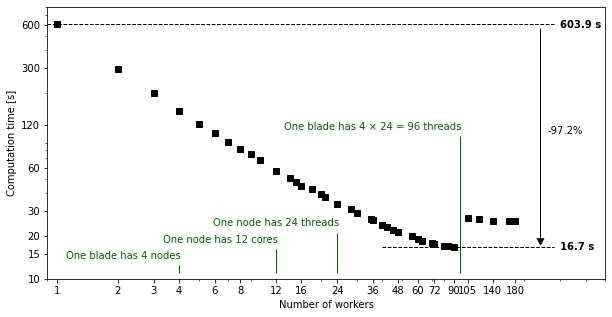

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharex=True)

max_duration = df_m["duration_slowest_worker"].to_numpy().max()
min_duration = df_m["duration_slowest_worker"].to_numpy().min()

# Visualize performance improvement
ax.hlines([max_duration], 0.9, 280, linewidth=1, color="k", linestyles="dashed")
ax.hlines([min_duration], 40, 280, linewidth=1, color="k", linestyles="dashed")

ax.text(300, max_duration, f"{max_duration:3.1f} s", verticalalignment="center", fontweight="bold")
ax.text(300, min_duration, f"{min_duration:3.1f} s", verticalalignment="center", fontweight="bold")

ax.arrow(240, max_duration - 40, 0, min_duration - max_duration + 2.5 + 40, 
         head_width=20, head_length=2, fc="k", ec="k", linewidth=0.5)
ax.text(260, min_duration + np.exp((np.log(max_duration) + np.log(min_duration)) / 2),
        f"{(min_duration - max_duration) / max_duration * 100:3.1f}%", 
        verticalalignment="top")


# Plot data
ax.loglog(df_m["n_workers"].to_numpy(), df_m["duration_slowest_worker"].to_numpy(), "ks")

# Draw annotations
ax.vlines([4], 11, 0.9 * 1.15 * 12, color="darkgreen", linewidth=1, linestyle="solid")
ax.text(1.02 * 4, 1.15 * 12, "One blade has 4 nodes", color="darkgreen", horizontalalignment="right")

ax.vlines([12], 11, 1.3 * 0.9 * 1.15 * 12, color="darkgreen", linewidth=1, linestyle="solid")
ax.text(1.02 * 12, 1.3 * 1.15 * 12, "One node has 12 cores", color="darkgreen", horizontalalignment="right")

ax.vlines([24], 11, 1.3**2 * 0.9 * 1.15 * 12, color="darkgreen", linewidth=1, linestyle="solid")
ax.text(1.02 * 24, 1.3**2 * 1.15 * 12, "One node has 24 threads", 
        color="darkgreen", horizontalalignment="right")

ax.vlines([24 * 4], 11, 8 * 0.9 * 1.15 * 12, color="darkgreen", linewidth=1, linestyle="solid")
ax.text(1.02 * (24 * 4), 8 * 1.15 * 12, "One blade has 4 × 24 = 96 threads", 
        color="darkgreen", horizontalalignment="right")

# Format axes
ax.set_xticks([1, 2, 3, 4, 6, 8, 12, 16, 24, 36, 48, 60, 72, 90, 105, 140, 180])
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))

ax.set_yticks([10, 15, 20, 30, 60, 120, 300, 600])
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))

ax.set_ylabel("Computation time [s]")
ax.set_xlabel("Number of workers")

ax.set_ylim(10, 800)
ax.set_xlim(0.9, 500)

fig.savefig("multi-node-plot.pdf", bbox_inches="tight")